# Create Your Own Mashup Bluesky Bot
There are all kinds of bot accounts on social media sites. It may look intimidating, but basic bots are actually more simple than they seem!

This notebook is concerned with creating a simple text posting bot best described as a "Mashup Bot". For example, Mark Sample has a bot that [combines Walt Whitman's poetry and FML posts](https://bsky.app/profile/whitmanfml.bsky.social):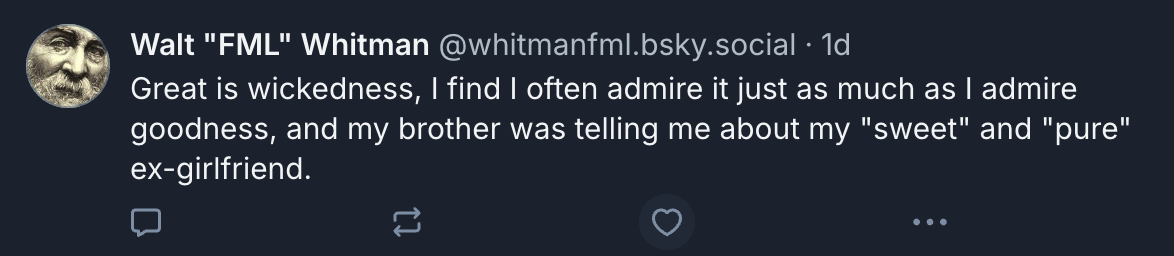

This is your chance to create your own! What two things would you combine?


> This notebook was adapted from Kyle Thayer's _Social Media, Ethics, and Automation_ textbook ([2.3.8](https://social-media-ethics-automation.github.io/book/bsky/ch02_definitions/03_automation/08_demo.html))

## Step 1: Connect to a Bluesky Account

Begin by running the cell below.

In [2]:
# Load some code called "Client" from the "atproto" library that will help us work with Bluesky
# %pip install atproto
from atproto import Client
import random
import pandas

Next, create a Bluesky account for your bot. See [this tutorial](https://social-media-ethics-automation.github.io/book/bsky/appendix/making_bot_account.html) if you need help.

Put your new username and password below. (_Always remember to remove this information if you publish your notebook online!_)

In [ ]:
# my_username = "mashup-bot.bsky.social"
# my_password = "YE@b3UNFP5j.pZd"

# client = Client(base_url="https://bsky.social")
# client.login(my_username, my_password)

ProfileViewDetailed(did='did:plc:74nqqsvec7mdhuzvb7g56bpu', handle='mashup-bot.bsky.social', associated=ProfileAssociated(feedgens=0, labeler=False, lists=0, py_type='app.bsky.actor.defs#profileAssociated', starterPacks=0), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:74nqqsvec7mdhuzvb7g56bpu/bafkreicln3pajduo6sn3iewlvvqpm5aiilqfmmgjjse3hgxykyzrenfzyq@jpeg', banner=None, description="Let's mash some phrases together!", display_name='Mashup Bot', followers_count=0, follows_count=0, indexed_at='2024-12-25T22:18:46.342Z', labels=[], posts_count=39, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewDetailed', createdAt='2024-12-25T22:08:39.343Z', pinnedPost={'cid': 'bafyreie7dftujanmhzp22envl4zimlywgvbblyp2gasdd47izgbxpiskhy', 'uri': 'at://did:plc:74nqqsvec7mdhuzvb7g56bpu/app.bsky.feed.post/3le5xzdttct2s'})

## Step 2: Generate the post text

Now it's time to get creative! You'll need two lists of different quotes to mash together. Include at least 5 different quotes, aiming for ones that include common conjunctions like "for, "to", "if", "but", or "and".

In [4]:
hozier_lyrics = ["I couldn't whisper when you needed it shouted, ah but I'm singing like a bird bout it now.",
                 "Screaming the name of a foreigner's god; the purest expression of grief",
                 "Staring at the blackness of some distant star, the thrill of knowing how alone we are, unknown we are",
                 "The gateway to the world was still outside the reach of him, would never belong to angels, had never belonged to men",
                 "When I was a man I thought it ended when I knew love’s perfect ache, but my peace has always depended on all the ashes in my wake"]

taylor_lyrics = ["You knew you won, so what's the point in keeping score?",
                 "You kept me like a secret, but I kept you like an oath.",
                 "You made a rebel of a careless man’s careful daughter.",
                 "I have this thing where I get older but just never wiser.",
                 "You made a rebel of a careless man’s careful daughter."]

kendrick_lyrics = ["While you muthafuckers waiting I be off the slave ship, building pyramids writing my own hieroglyphs.",
                   "See in a perfect world I'll choose faith over riches, I'll choose work over bitches, I'll make schools out of prison.",
                   "If I'm generous at heart I dont need no recognition. The way I'm rewarded, well, that's God's decision.",
                   "I pray to God you actually pray when somebody dies. Thoughts and prayers, way better off timelines, false claimin' not cute, I'm mortified.",
                   "I got a story to tell, you know that I cherish these. Hope it ain't too many feelings involved."]

mcr_lyrics =    ["Everybody wants to change the world but no one, no one wants to die",
                 "Oh how wrong we were to think that immortality meant never dying",
                 "Take my hand and then we'll love the mystery of laceration gravity",
                 "We'll love again, we'll laugh again, we'll cry again, and we'll dance again",
                 "They're gonna clean up your looks with all the lies in the books to make a citizen out of you."]

shakespeare =   ["This above all; to thine own self be true.",
                 "Who could refrain that had a heart to love and in that heart courage to make love known?",
                 "A fool thinks himself to be wise, but a wise man knows himself to be a fool.",
                 "Who could refrain that had a heart to love and in that heart courage to make love known?",
                 "He does it with better grace, but I do it more natural."]

toni_morrison = ["What difference do it make if the thing you scared of is real or not?",
                 "As you enter positions of trust and power, dream a little before you think.",
                 "It was a fine cry - loud and long - but it had no bottom and it had no top, just circles and circles of sorrow.",
                 "We die. That may be the meaning of life. But we do language. That may be the measure of our lives.",
                 "There is really nothing more to say-except why. But since why is difficult to handle, one must take refuge in how."]

In [30]:
# Choose your lists
def get_lists():
    lists = [hozier_lyrics, taylor_lyrics, mcr_lyrics, kendrick_lyrics, shakespeare, toni_morrison]
    list_1 = random.choice(lists)
    lists.remove(list_1)
    list_2 = random.choice(lists)

    return list_1, list_2


In [31]:
def get_lyric():
    list_1, list_2 = get_lists()

    # Pick a random phrase from the first list
    phrase_1 = random.choice(list_1)
    # Get the fragment of words starting from the 6th word
    frag_1 = phrase_1.split()[5:]

    # Create a list to store possible connections
    possible_ends = []

    # Go through each phrase in the second list
    for phrase in list_2:
        # Get the part of the phrase excluding the last 4 words
        frag_2 = phrase.split()[:-4]
        # Check for matching words between frag_1 and frag_2
        for word in frag_1:
            if word in frag_2:
                # If there's a match, save the word and the phrase
                possible_ends.append([word, phrase])

    # If there are connections, pick one at random
    if possible_ends:
        end = random.choice(possible_ends)
        matching_word = end[0]
        phrase_2 = end[1]
        # Split and combine the phrases around the matching word
        part_1 = phrase_1.split(f" {matching_word} ", 1)[0]
        part_2 = phrase_2.split(f" {matching_word} ", 1)[1]
        combined_phrase = f"{part_1} {matching_word} {part_2}"
    else:
        # If no connections are found, try again
        return get_lyric()

    # The final combined phrase
    return combined_phrase

## Note: code comments generated using GPT4

In [42]:
post_text = get_lyric()
post_text

'Screaming the slave ship, building pyramids writing my own hieroglyphs.'

## Step 3: Post to Bluesky

Once you've generated your text, all that's left is to release it to the internet! Simply run the cell below and check your profile to see your new post.

In [34]:
# client.send_post(post_text)

CreateRecordResponse(uri='at://did:plc:74nqqsvec7mdhuzvb7g56bpu/app.bsky.feed.post/3lgcperttfa2r', cid='bafyreidfsob3pj7hxunusgjrqtb3m7hjftz3vulrqugft35xfrkmnaxx3u')

You did it! Check out my bot here: https://bsky.app/profile/mashup-bot.bsky.social